In [2]:
import json

# Load the JSON data from the file
with open('MC3.json', encoding='utf-8') as file:
    data = json.load(file)

# Initialize empty lists for keys and values
keys = []
values = []

# Iterate over each dictionary in the 'nodes' list
for dictionary in data['nodes']:
    # Extract the keys and values from the dictionary
    for key, value in dictionary.items():
        keys.append(key)
        values.append(value)

# Print the lists of keys and values
print("Keys:", keys)
print("Values:", values)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# Convert the 'keys' list to a set to get unique elements
unique_keys = set(keys)

# Print the unique keys
print("Unique Keys:", unique_keys)


Unique Keys: {'product_services', 'country', 'revenue_omu', 'type', 'id'}


In [3]:
import pandas as pd
import json

# Load the JSON data from the file
with open('MC3.json', encoding='utf-8') as file:
    data = json.load(file)

# Initialize an empty list to store the data rows
rows = []

# Iterate over each dictionary in the 'nodes' list
for dictionary in data['nodes']:
    # Extract the values for 'type', 'dataset', 'country', 'id' keys
    type_value = dictionary.get('type', ' ')[0]
    product_value = dictionary.get('product_services', ' ')
  #  product_value = product_value.strip('[]').split(',')[0].strip()
    country_value = dictionary.get('country', ' ')[0]
    revenue_omu_value = dictionary.get('revenue_omu', ' ')[0]
    id_value = dictionary.get('id', ' ')[0]

    # Append the values as a new row to the list
    rows.append([type_value,product_value, country_value,revenue_omu_value, id_value])

# Create a DataFrame with the specified columns and filled data
df = pd.DataFrame(rows, columns=['type', 'product', 'country','revenue', 'id'])

# Print the DataFrame
print(df)


                   type                                            product  \
0               Company                                      [Automobiles]   
1               Company          [Passenger cars, trucks, vans, and buses]   
2               Company  [Holding firm whose subsidiaries are engaged i...   
3               Company  [Car service, car parts and accessories, autom...   
4               Company  [Fully electric vehicles (EVs) and electric ve...   
...                 ...                                                ...   
27617  Company Contacts                                                 []   
27618  Company Contacts                                                 []   
27619  Company Contacts                                                 []   
27620  Company Contacts                                                 []   
27621  Company Contacts                                                 []   

          country         revenue                              

In [4]:
df.to_csv("dataset.csv")

In [5]:
#understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27622 entries, 0 to 27621
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     27622 non-null  object
 1   product  27622 non-null  object
 2   country  27622 non-null  object
 3   revenue  27622 non-null  object
 4   id       27622 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [7]:
df.describe()

,type,product,country,revenue,id
count,27622,27622,27622,27622,27622
unique,3,3244,100,4639,22929
top,Beneficial Owner,[],ZH,,Smith LLC
freq,11949,18959,22439,18959,40


In [8]:
df.isnull().sum()

type       0
product    0
country    0
revenue    0
id         0
dtype: int64

In [9]:
unique_values = df["revenue"].unique()


In [10]:
unique_values

array([310612303.447, 162734683.9969, 115004666.6728, ..., 131680733.227,
       142196552.227, ' '], dtype=object)

In [11]:
import pandas as pd

# Replace empty strings with null values in the DataFrame
df.replace(' ', pd.NA, inplace=True)

# Check for null values
print(df.isnull().sum())

type           0
product        0
country        0
revenue    18959
id             0
dtype: int64


In [12]:
import pandas as pd

# Convert non-numeric values to NaN
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Calculate the mean  or average
#mean_revenue = df["revenue"].mean()

# Fill missing values with the mean
#df["revenue"].fillna(mean_revenue, inplace=True)
df = df.dropna(subset=['revenue'], axis=0)
#df["revenue"].dropna(axis=1)

In [13]:
df.isnull().sum()


type       0
product    0
country    0
revenue    0
id         0
dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6107 entries, 0 to 8662
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   type     6107 non-null   object 
 1   product  6107 non-null   object 
 2   country  6107 non-null   object 
 3   revenue  6107 non-null   float64
 4   id       6107 non-null   object 
dtypes: float64(1), object(4)
memory usage: 286.3+ KB


In [15]:
df.head()

,type,product,country,revenue,id
0,Company,[Automobiles],ZH,3.106123e+08,Jones LLC
1,Company,"[Passenger cars, trucks, vans, and buses]",ZH,1.627347e+08,"Coleman, Hall and Lopez"
2,Company,[Holding firm whose subsidiaries are engaged i...,Oceanus,1.150047e+08,Aqua Advancements Sashimi SE Express
3,Company,"[Car service, car parts and accessories, autom...",Utoporiana,9.098641e+07,Makumba Ltd. Liability Co
4,Company,[Fully electric vehicles (EVs) and electric ve...,ZH,8.146667e+07,"Taylor, Taylor and Farrell"


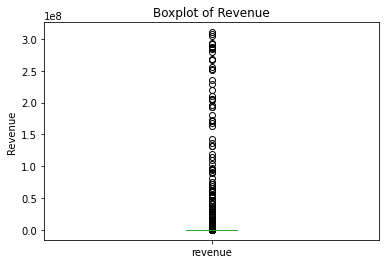

In [16]:
import matplotlib.pyplot as plt

df["revenue"].plot.box()
plt.ylabel("Revenue")
plt.title("Boxplot of Revenue")
plt.show()


In [17]:
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.75)


In [18]:
IQR = Q3 - Q1


In [19]:
Q3,Q1

(48327.661550000004, 7676.35915)

In [20]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)



In [21]:
df_filtered = df[(df["revenue"] >= lower_bound) & (df["revenue"] <= upper_bound)]


In [22]:
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.65)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df_filtered = df[(df["revenue"] >= lower_bound) & (df["revenue"] <= upper_bound)]


In [23]:
df_filtered

,type,product,country,revenue,id
1259,Company,[Commercial fishing equipment],ZH,59764.8570,Morales PLC
1260,Company,"[Prawns, squids, and octopus; Refrigerated smo...",Nalakond,59682.0101,Sea Breezes Sagl Seaside
1261,Company,"[Luxury vinyl flooring, premium laminate and a...",ZH,59666.6728,Walker-Richardson
1262,Company,[Clothing and footwear products],ZH,59666.6728,"Payne, Freeman and Kim"
1263,Company,[Consumer adhesives and craftsman adhesives],ZH,59639.9498,"Mcmillan, Brock and Carroll"
...,...,...,...,...,...
6046,Company,[Management and consultancy services],Oceanus,4666.6728,Gujarat Sea Plc United
6047,Company,[Unknown],ZH,4666.6728,"Li, Hudson and Mclean"
6048,Company,[Unknown],ZH,4660.6650,"Boyer, Tucker and Diaz"
6049,Company,[Unknown],Marebak,4657.7974,Bu yu wang Pic Export


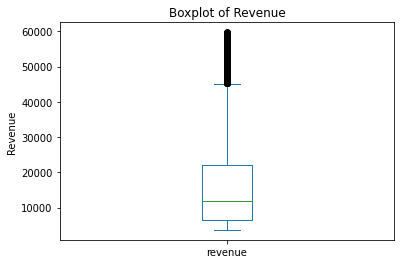

In [24]:
import matplotlib.pyplot as plt

df_filtered["revenue"].plot.box()
plt.ylabel("Revenue")
plt.title("Boxplot of Revenue")
plt.show()


In [25]:
df_filtered

,type,product,country,revenue,id
1259,Company,[Commercial fishing equipment],ZH,59764.8570,Morales PLC
1260,Company,"[Prawns, squids, and octopus; Refrigerated smo...",Nalakond,59682.0101,Sea Breezes Sagl Seaside
1261,Company,"[Luxury vinyl flooring, premium laminate and a...",ZH,59666.6728,Walker-Richardson
1262,Company,[Clothing and footwear products],ZH,59666.6728,"Payne, Freeman and Kim"
1263,Company,[Consumer adhesives and craftsman adhesives],ZH,59639.9498,"Mcmillan, Brock and Carroll"
...,...,...,...,...,...
6046,Company,[Management and consultancy services],Oceanus,4666.6728,Gujarat Sea Plc United
6047,Company,[Unknown],ZH,4666.6728,"Li, Hudson and Mclean"
6048,Company,[Unknown],ZH,4660.6650,"Boyer, Tucker and Diaz"
6049,Company,[Unknown],Marebak,4657.7974,Bu yu wang Pic Export


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

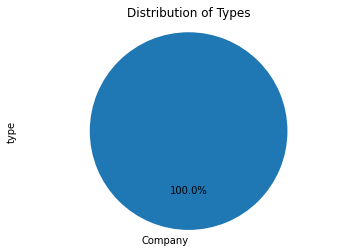

In [27]:
# Count the occurrences of each unique value in the 'type' column
type_counts =df_filtered['type'].value_counts()

# Plot the pie chart
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Types')

# Display the chart
plt.show()

In [28]:
unique_values_country = df["country"].unique()
unique_values_country

array(['ZH', 'Oceanus', 'Utoporiana', 'Riodelsol', 'Rio Isla',
       'Coralmarica', 'Isliandor', 'Osterivaria', 'Kondanovia',
       'Alverovia', 'Galduzim', 'Gavanovia', 'Puerto Sol', 'Marebak',
       'Sol y Oceana', 'Rosvandor', 'Puerto del Mar', 'Azurionix',
       'Merigrad', 'Lumindoria', 'Alverossia', 'Faraluna', 'Zawalinda',
       'Coral Solis', 'Vesperanda', 'Icarnia', 'Helixia', 'Talandria',
       'Nalakond', 'Korvelonia', 'Thessalandia', 'Solovarossa',
       'Jiraputra', 'Playa Solis', 'Marifada', 'Brindivaria', 'Andenovia',
       'Arreciviento', 'Mawazam', 'Brindisola', 'Mango del Oro',
       'Coralada', 'Ariuzima', 'Chrysazul', 'Mawandia', 'Osterivaro',
       'Utoparadia', 'Arvaros', 'Nalaloria', 'Uzifrica', 'Imazam',
       'Novarcticaa', 'Mawalara', 'Afarivaria', 'Yggdrasonia', 'Uziland',
       'Polarisdom', 'Luminkind', 'Kondarica', 'Quornova', 'Baziuzim',
       'Lumakari', 'Oceanterra', 'Portovia', 'Kondarivakia', 'Vientoro',
       'Wysterion', 'Morolaria', '

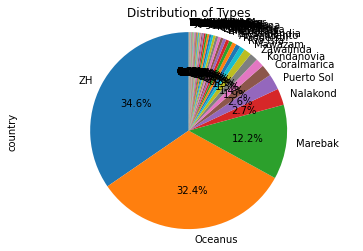

In [29]:
# Count the occurrences of each unique value in the 'type' column
type_counts =df_filtered['country'].value_counts()

# Plot the pie chart
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Types')

# Display the chart
plt.show()

            revenue
count   4792.000000
mean   16661.397626
std    13251.029813
min     3652.226600
25%     6560.318700
50%    11755.947800
75%    22000.744700
max    59764.857000


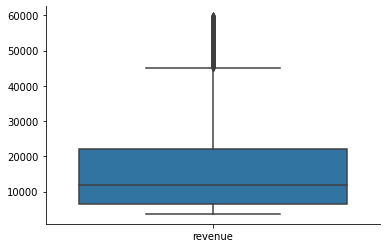

In [30]:
# Compute summary statistics
import seaborn as sns
summary = df_filtered.describe()

# Plot using Seaborn
sns.boxplot(data=df_filtered)
sns.despine()

# Display the summary statistics
print(summary)

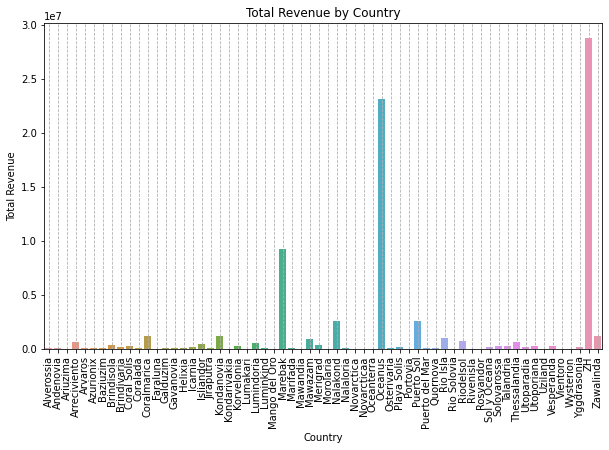

In [31]:
# Calculate the total revenue for each country
country_revenue =df_filtered.groupby('country')['revenue'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your requirements

# Plot the bar graph
ax = sns.barplot(data=country_revenue, x='country', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

# Customize x-axis tick marks
plt.xticks(range(len(country_revenue)), country_revenue['country'])  # Set x-axis tick positions and labels
plt.gca().xaxis.grid(True, linestyle='--')  # Add gridlines between x-ticks

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country')

# Display the bar graph
plt.show()

In [32]:
unique_values_id = df["id"].unique()
len(unique_values_id)

5837

In [33]:
df_filtered.columns

Index(['type', 'product', 'country', 'revenue', 'id'], dtype='object')

In [34]:
mode_value = df['country'].mode()

In [35]:
mode_value 

0    ZH
dtype: object

In [36]:
mode_value = df['id'].mode()

In [37]:
mode_value

0    Irish Mackerel S.A. de C.V. Marine biology
dtype: object

In [38]:
#correlation

In [40]:

# Assuming your DataFrame is named 'df'
unique_cities = df_filtered['country'].unique()
city_mapping = {}

for i, city in enumerate(unique_cities, 1):
    city_mapping[city] = i

    
print(city_mapping)
df_filtered['country'] = df_filtered['country'].map(city_mapping)

print(df)


{'ZH': 1, 'Nalakond': 2, 'Marebak': 3, 'Oceanus': 4, 'Arreciviento': 5, 'Gavanovia': 6, 'Zawalinda': 7, 'Puerto Sol': 8, 'Alverossia': 9, 'Quornova': 10, 'Riodelsol': 11, 'Vesperanda': 12, 'Thessalandia': 13, 'Luminkind': 14, 'Utoparadia': 15, 'Rio Isla': 16, 'Utoporiana': 17, 'Isliandor': 18, 'Lumindoria': 19, 'Mawazam': 20, 'Coralmarica': 21, 'Brindisola': 22, 'Sol y Oceana': 23, 'Kondanovia': 24, 'Helixia': 25, 'Merigrad': 26, 'Talandria': 27, 'Andenovia': 28, 'Brindivaria': 29, 'Galduzim': 30, 'Baziuzim': 31, 'Marifada': 32, 'Yggdrasonia': 33, 'Jiraputra': 34, 'Icarnia': 35, 'Korvelonia': 36, 'Solovarossa': 37, 'Coral Solis': 38, 'Coralada': 39, 'Osterivaria': 40, 'Puerto del Mar': 41, 'Playa Solis': 42, 'Mawandia': 43, 'Uziland': 44, 'Azurionix': 45, 'Nalaloria': 46, 'Lumakari': 47, 'Oceanterra': 48, 'Portovia': 49, 'Kondarivakia': 50, 'Ariuzima': 51, 'Arvaros': 52, 'Mango del Oro': 53, 'Faraluna': 54, 'Novarcticaa': 55, 'Vientoro': 56, 'Wysterion': 57, 'Morolaria': 58, 'Novarctic

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [42]:
df_filtered.head()

,type,product,country,revenue,id
1259,Company,[Commercial fishing equipment],1,59764.8570,Morales PLC
1260,Company,"[Prawns, squids, and octopus; Refrigerated smo...",2,59682.0101,Sea Breezes Sagl Seaside
1261,Company,"[Luxury vinyl flooring, premium laminate and a...",1,59666.6728,Walker-Richardson
1262,Company,[Clothing and footwear products],1,59666.6728,"Payne, Freeman and Kim"
1263,Company,[Consumer adhesives and craftsman adhesives],1,59639.9498,"Mcmillan, Brock and Carroll"


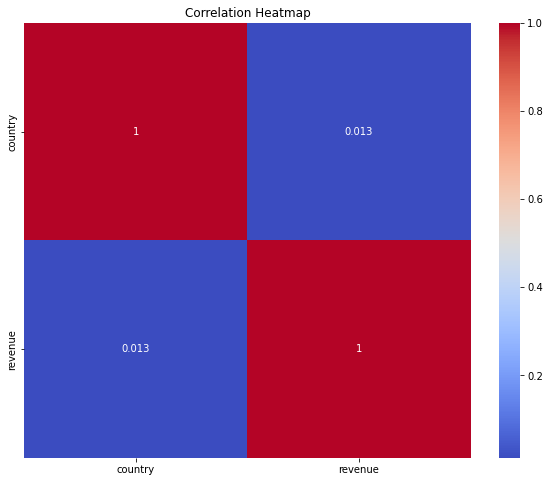

In [43]:
# Assuming your DataFrame is named 'df'
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
#correlation matrics

In [68]:
correlation_matrix

,country,revenue
country,1.000000,0.012566
revenue,0.012566,1.000000


In [44]:
#relational plot

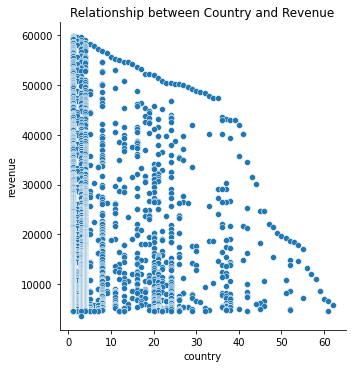

In [78]:
# Assuming your DataFrame is named 'df'
sns.relplot(data=df_filtered, x="country", y="revenue", kind="scatter")
plt.title("Relationship between Country and Revenue")
plt.show()

<Figure size 1296x648 with 0 Axes>

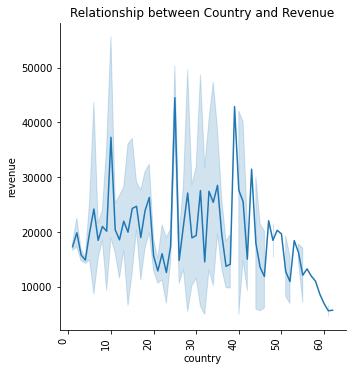

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(18, 9))  # Set the figure size (width, height) in inches

sns.relplot(data=df_filtered, x="country", y="revenue", kind="line")
plt.title("Relationship between Country and Revenue")
plt.xticks(rotation=90, ha='right')

# Adjust the figure margins if necessary
#plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

plt.show()


In [81]:
df_filtered.head()

,type,product,country,revenue,id
1259,Company,[Commercial fishing equipment],1,59764.8570,Morales PLC
1260,Company,"[Prawns, squids, and octopus; Refrigerated smo...",2,59682.0101,Sea Breezes Sagl Seaside
1261,Company,"[Luxury vinyl flooring, premium laminate and a...",1,59666.6728,Walker-Richardson
1262,Company,[Clothing and footwear products],1,59666.6728,"Payne, Freeman and Kim"
1263,Company,[Consumer adhesives and craftsman adhesives],1,59639.9498,"Mcmillan, Brock and Carroll"


In [82]:
#create a new column called number o fproducts 

In [83]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'product'
df_filtered['number_products'] = df_filtered['product'].apply(lambda x: len(str(x).split(',')))



/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df_filtered['number_products'] 

1259     1
1260    22
1261     2
1262     1
1263     1
        ..
6046     1
6047     1
6048     1
6049     1
6050     1
Name: number_products, Length: 4792, dtype: int64

In [86]:
df_filtered.head()

,type,product,country,revenue,id,number_products
1259,Company,[Commercial fishing equipment],1,59764.8570,Morales PLC,1
1260,Company,"[Prawns, squids, and octopus; Refrigerated smo...",2,59682.0101,Sea Breezes Sagl Seaside,22
1261,Company,"[Luxury vinyl flooring, premium laminate and a...",1,59666.6728,Walker-Richardson,2
1262,Company,[Clothing and footwear products],1,59666.6728,"Payne, Freeman and Kim",1
1263,Company,[Consumer adhesives and craftsman adhesives],1,59639.9498,"Mcmillan, Brock and Carroll",1


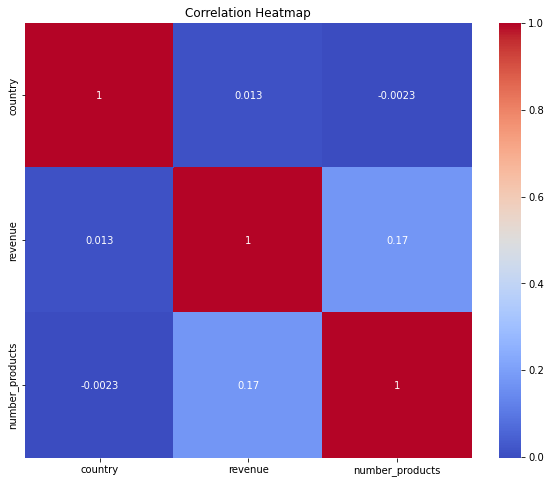

In [87]:
# Assuming your DataFrame is named 'df'
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [88]:
correlation_matrix

,country,revenue,number_products
country,1.000000,0.012566,-0.002264
revenue,0.012566,1.000000,0.173940
number_products,-0.002264,0.173940,1.000000


In [89]:
mean_product_number = df_filtered['number_products'].mean()

In [91]:
mean_product_number   #average number of product people bought

2.301126878130217

In [92]:
df_filtered.describe()

,country,revenue,number_products
count,4792.000000,4792.000000,4792.000000
mean,5.621870,16661.397626,2.301127
std,8.313454,13251.029813,3.873777
min,1.000000,3652.226600,1.000000
25%,1.000000,6560.318700,1.000000
50%,4.000000,11755.947800,1.000000
75%,4.000000,22000.744700,1.000000
max,62.000000,59764.857000,65.000000


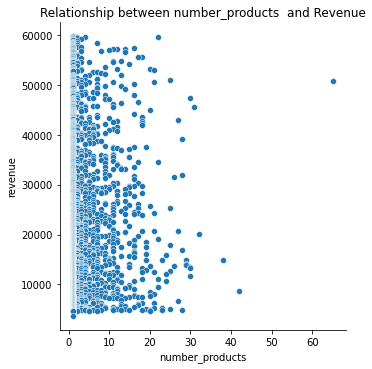

In [93]:
# Assuming your DataFrame is named 'df'
sns.relplot(data=df_filtered, x="number_products", y="revenue", kind="scatter")
plt.title("Relationship between number_products  and Revenue")
plt.show()

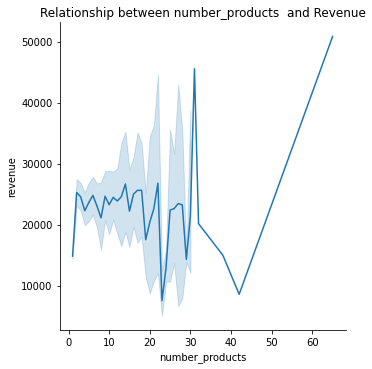

In [94]:
# Assuming your DataFrame is named 'df'
sns.relplot(data=df_filtered, x="number_products", y="revenue", kind="line")
plt.title("Relationship between number_products  and Revenue")
plt.show()

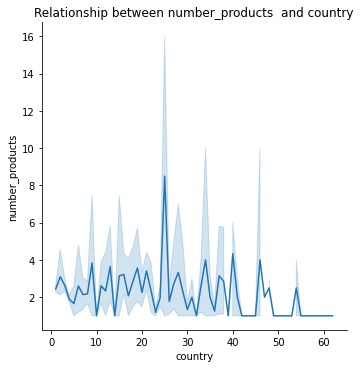

In [96]:
# Assuming your DataFrame is named 'df'
sns.relplot(data=df_filtered, y="number_products", x="country", kind="line")
plt.title("Relationship between number_products  and country")
plt.show()